<a href="https://colab.research.google.com/github/abksyed/EVA4/blob/master/S6/EVA4S6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from __future__ import print_function
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms

In [2]:
torch.cuda.get_device_name(0)

'Tesla K80'

In [ ]:
# Commented as not used
# https://buomsoo-kim.github.io/colab/2018/04/16/Importing-files-from-Google-Drive-in-Google-Colab.md/
#  Install PyDrive
# !pip install PyDrive

In [ ]:
# Commented as not used
# modules need to be imported in advance to create connection between Colab and Drive
# from pydrive.auth import GoogleAuth
# from pydrive.drive import GoogleDrive
# from google.colab import auth
# from oauth2client.client import GoogleCredentials

In [ ]:
# Commented as not used
# Authenticate and create the PyDrive client
# auth.authenticate_user()
# gauth = GoogleAuth()
# gauth.credentials = GoogleCredentials.get_application_default()
# drive = GoogleDrive(gauth)

In [3]:
# connect to google drive
from google.colab import drive
drive.mount("/content/gdrive")

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [ ]:
#!ls
#!pwd

In [ ]:
#gdrivepath="gdrive/My Drive/Colab Notebooks/S6/"
# Get the file
#import sys
#sys.path.append(gdrivepath)
# !ls
# !ls  "gdrive/My Drive/Colab Notebooks/S6/"


In [4]:
gdrivepath="gdrive/My Drive/Colab Notebooks/S6/"
!pip install tqdm

# File Already available hence commented.
# copying from gdrive to current directory of colab
!pwd
!cp "gdrive/My Drive/Colab Notebooks/S6/test.py" test.py
!cp "gdrive/My Drive/Colab Notebooks/S6/model.py" model.py
!cp "gdrive/My Drive/Colab Notebooks/S6/train.py" train.py
!cp "gdrive/My Drive/Colab Notebooks/S6/data.py" data.py
!cp "gdrive/My Drive/Colab Notebooks/S6/test_misclass.py" test_misclass.py

/content


In [5]:
!ls

data.py  gdrive  model.py  sample_data	test_misclass.py  test.py  train.py


In [6]:
import data
train_loader, test_loader = data.load()

Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw


Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw


Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw


Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw
Processing...
Done!
CUDA Available? True


/usr/local/lib/python3.6/dist-packages/torchvision/datasets/mnist.py:469: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  /pytorch/torch/csrc/utils/tensor_numpy.cpp:141.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


In [7]:
import train
import test as t

In [8]:
import model as m

In [9]:
use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")
from torch.optim.lr_scheduler import StepLR

# SPLITTING TASKS INTO BN & GHOSTBN AS 100% RAM IS UTILISED AND CRASHING..IN COLAB for all the 8 tasks
epochs = 25
tasks = {'WithL1_NoL2 with BN':[1e-5,0,False],
         'NoL1_WithL2 with BN':[0,1e-5,False],
         'WithL1_WithL2 with BN':[1e-5,1e-5,False],
         'NoL1_NoL2 with GhostBN':[0,0,True],
         'WithL1_WithL2 with GhostBN':[1e-5,1e-5,True]}
      
print()
for key,(lam1, lam2, gbn) in tasks.items():
  
  print('--------------------------------------------------------------------------------------------------------------------------------')
  print('********************************************* ', key, '*********************************************')
  print('--------------------------------------------------------------------------------------------------------------------------------')
  print('Task Performed: ', key)
  print('L1 Lambda Value: ', lam1)
  print('L2 Lambda Value: ', lam2)
  if gbn:
    print('Ghost Batch Normalisation')
  else:
    print('Batch Normalisation')
  
  model = m.Net(gbn).to(device)
  optimizer = train.optimizer(model, lam2)
  scheduler = StepLR(optimizer, step_size= 7, gamma= 0.1)
  print("")
  for epoch in range(epochs):
    print('EPOCH: ', epoch+1)
    train.train(model, device, train_loader, optimizer, epoch, lam= lam1)
    scheduler.step()
    #print("after train")
    t.test(model, device, test_loader, key)


--------------------------------------------------------------------------------------------------------------------------------
*********************************************  WithL1_NoL2 with BN *********************************************
--------------------------------------------------------------------------------------------------------------------------------
Task Performed:  WithL1_NoL2 with BN
L1 Lambda Value:  1e-05
L2 Lambda Value:  0
Batch Normalisation


  0%|          | 0/938 [00:00<?, ?it/s]


EPOCH:  1


Loss=0.014887317083775997 Batch_id=937 Accuracy=93.18: 100%|██████████| 938/938 [00:33<00:00, 28.24it/s]
  0%|          | 0/938 [00:00<?, ?it/s]


Test set: Average loss: 0.0574, Accuracy: 9833/10000 (98.33%)

EPOCH:  2


Loss=0.03838891535997391 Batch_id=937 Accuracy=98.39: 100%|██████████| 938/938 [00:33<00:00, 28.25it/s]
  0%|          | 0/938 [00:00<?, ?it/s]


Test set: Average loss: 0.0413, Accuracy: 9881/10000 (98.81%)

EPOCH:  3


Loss=0.03474003076553345 Batch_id=937 Accuracy=98.74: 100%|██████████| 938/938 [00:33<00:00, 28.01it/s]
  0%|          | 0/938 [00:00<?, ?it/s]


Test set: Average loss: 0.0311, Accuracy: 9903/10000 (99.03%)

EPOCH:  4


Loss=0.023212796077132225 Batch_id=937 Accuracy=98.89: 100%|██████████| 938/938 [00:33<00:00, 27.97it/s]
  0%|          | 0/938 [00:00<?, ?it/s]


Test set: Average loss: 0.0300, Accuracy: 9913/10000 (99.13%)

EPOCH:  5


Loss=0.06914865225553513 Batch_id=937 Accuracy=98.97: 100%|██████████| 938/938 [00:33<00:00, 28.04it/s]
  0%|          | 0/938 [00:00<?, ?it/s]


Test set: Average loss: 0.0252, Accuracy: 9928/10000 (99.28%)

EPOCH:  6


Loss=0.21556022763252258 Batch_id=937 Accuracy=99.20: 100%|██████████| 938/938 [00:33<00:00, 27.96it/s]
  0%|          | 0/938 [00:00<?, ?it/s]


Test set: Average loss: 0.0236, Accuracy: 9926/10000 (99.26%)

EPOCH:  7


Loss=0.009718614630401134 Batch_id=937 Accuracy=99.20: 100%|██████████| 938/938 [00:33<00:00, 27.96it/s]
  0%|          | 0/938 [00:00<?, ?it/s]


Test set: Average loss: 0.0243, Accuracy: 9921/10000 (99.21%)

EPOCH:  8


Loss=0.011393648572266102 Batch_id=937 Accuracy=99.50: 100%|██████████| 938/938 [00:33<00:00, 27.93it/s]
  0%|          | 0/938 [00:00<?, ?it/s]


Test set: Average loss: 0.0186, Accuracy: 9936/10000 (99.36%)

EPOCH:  9


Loss=0.045103225857019424 Batch_id=937 Accuracy=99.58: 100%|██████████| 938/938 [00:33<00:00, 27.87it/s]
  0%|          | 0/938 [00:00<?, ?it/s]


Test set: Average loss: 0.0184, Accuracy: 9938/10000 (99.38%)

EPOCH:  10


Loss=0.019153354689478874 Batch_id=937 Accuracy=99.58: 100%|██████████| 938/938 [00:33<00:00, 28.06it/s]
  0%|          | 0/938 [00:00<?, ?it/s]


Test set: Average loss: 0.0183, Accuracy: 9942/10000 (99.42%)

EPOCH:  11


Loss=0.0085537014529109 Batch_id=937 Accuracy=99.61: 100%|██████████| 938/938 [00:33<00:00, 28.09it/s]
  0%|          | 0/938 [00:00<?, ?it/s]


Test set: Average loss: 0.0176, Accuracy: 9939/10000 (99.39%)

EPOCH:  12


Loss=0.04819779098033905 Batch_id=937 Accuracy=99.60: 100%|██████████| 938/938 [00:33<00:00, 28.09it/s]
  0%|          | 0/938 [00:00<?, ?it/s]


Test set: Average loss: 0.0174, Accuracy: 9940/10000 (99.40%)

EPOCH:  13


Loss=0.026568282395601273 Batch_id=937 Accuracy=99.61: 100%|██████████| 938/938 [00:33<00:00, 28.08it/s]
  0%|          | 0/938 [00:00<?, ?it/s]


Test set: Average loss: 0.0179, Accuracy: 9942/10000 (99.42%)

EPOCH:  14


Loss=0.007935300469398499 Batch_id=937 Accuracy=99.61: 100%|██████████| 938/938 [00:33<00:00, 28.11it/s]
  0%|          | 0/938 [00:00<?, ?it/s]


Test set: Average loss: 0.0180, Accuracy: 9941/10000 (99.41%)

EPOCH:  15


Loss=0.014875520020723343 Batch_id=937 Accuracy=99.66: 100%|██████████| 938/938 [00:33<00:00, 28.16it/s]
  0%|          | 0/938 [00:00<?, ?it/s]


Test set: Average loss: 0.0181, Accuracy: 9934/10000 (99.34%)

EPOCH:  16


Loss=0.12241494655609131 Batch_id=937 Accuracy=99.67: 100%|██████████| 938/938 [00:32<00:00, 28.43it/s]
  0%|          | 0/938 [00:00<?, ?it/s]


Test set: Average loss: 0.0181, Accuracy: 9936/10000 (99.36%)

EPOCH:  17


Loss=0.011960787698626518 Batch_id=937 Accuracy=99.67: 100%|██████████| 938/938 [00:33<00:00, 28.16it/s]
  0%|          | 0/938 [00:00<?, ?it/s]


Test set: Average loss: 0.0178, Accuracy: 9936/10000 (99.36%)

EPOCH:  18


Loss=0.022907104343175888 Batch_id=937 Accuracy=99.65: 100%|██████████| 938/938 [00:33<00:00, 28.12it/s]
  0%|          | 0/938 [00:00<?, ?it/s]


Test set: Average loss: 0.0181, Accuracy: 9937/10000 (99.37%)

EPOCH:  19


Loss=0.11075223237276077 Batch_id=937 Accuracy=99.68: 100%|██████████| 938/938 [00:33<00:00, 28.42it/s]
  0%|          | 0/938 [00:00<?, ?it/s]


Test set: Average loss: 0.0182, Accuracy: 9938/10000 (99.38%)

EPOCH:  20


Loss=0.1349906623363495 Batch_id=937 Accuracy=99.65: 100%|██████████| 938/938 [00:33<00:00, 28.18it/s]
  0%|          | 0/938 [00:00<?, ?it/s]


Test set: Average loss: 0.0179, Accuracy: 9939/10000 (99.39%)

EPOCH:  21


Loss=0.011121165938675404 Batch_id=937 Accuracy=99.68: 100%|██████████| 938/938 [00:33<00:00, 28.00it/s]
  0%|          | 0/938 [00:00<?, ?it/s]


Test set: Average loss: 0.0184, Accuracy: 9935/10000 (99.35%)

EPOCH:  22


Loss=0.0194818377494812 Batch_id=937 Accuracy=99.68: 100%|██████████| 938/938 [00:33<00:00, 28.16it/s]
  0%|          | 0/938 [00:00<?, ?it/s]


Test set: Average loss: 0.0184, Accuracy: 9935/10000 (99.35%)

EPOCH:  23


Loss=0.008325266651809216 Batch_id=937 Accuracy=99.65: 100%|██████████| 938/938 [00:33<00:00, 28.00it/s]
  0%|          | 0/938 [00:00<?, ?it/s]


Test set: Average loss: 0.0181, Accuracy: 9939/10000 (99.39%)

EPOCH:  24


Loss=0.010085370391607285 Batch_id=937 Accuracy=99.68: 100%|██████████| 938/938 [00:33<00:00, 28.17it/s]
  0%|          | 0/938 [00:00<?, ?it/s]


Test set: Average loss: 0.0178, Accuracy: 9938/10000 (99.38%)

EPOCH:  25


Loss=0.009234754368662834 Batch_id=937 Accuracy=99.69: 100%|██████████| 938/938 [00:33<00:00, 27.97it/s]
  0%|          | 0/938 [00:00<?, ?it/s]


Test set: Average loss: 0.0173, Accuracy: 9940/10000 (99.40%)

--------------------------------------------------------------------------------------------------------------------------------
*********************************************  NoL1_WithL2 with BN *********************************************
--------------------------------------------------------------------------------------------------------------------------------
Task Performed:  NoL1_WithL2 with BN
L1 Lambda Value:  0
L2 Lambda Value:  1e-05
Batch Normalisation

EPOCH:  1


Loss=0.2874118685722351 Batch_id=937 Accuracy=92.91: 100%|██████████| 938/938 [00:29<00:00, 32.10it/s]
  0%|          | 0/938 [00:00<?, ?it/s]


Test set: Average loss: 0.0499, Accuracy: 9851/10000 (98.51%)

EPOCH:  2


Loss=0.15042416751384735 Batch_id=937 Accuracy=98.42: 100%|██████████| 938/938 [00:29<00:00, 32.27it/s]
  0%|          | 0/938 [00:00<?, ?it/s]


Test set: Average loss: 0.0534, Accuracy: 9821/10000 (98.21%)

EPOCH:  3


Loss=0.004667756147682667 Batch_id=937 Accuracy=98.77: 100%|██████████| 938/938 [00:29<00:00, 32.23it/s]
  0%|          | 0/938 [00:00<?, ?it/s]


Test set: Average loss: 0.0334, Accuracy: 9901/10000 (99.01%)

EPOCH:  4


Loss=0.07147638499736786 Batch_id=937 Accuracy=98.96: 100%|██████████| 938/938 [00:28<00:00, 32.53it/s]
  0%|          | 0/938 [00:00<?, ?it/s]


Test set: Average loss: 0.0272, Accuracy: 9910/10000 (99.10%)

EPOCH:  5


Loss=0.03519687429070473 Batch_id=937 Accuracy=99.12: 100%|██████████| 938/938 [00:29<00:00, 32.05it/s]
  0%|          | 0/938 [00:00<?, ?it/s]


Test set: Average loss: 0.0263, Accuracy: 9913/10000 (99.13%)

EPOCH:  6


Loss=0.009986743330955505 Batch_id=937 Accuracy=99.24: 100%|██████████| 938/938 [00:29<00:00, 32.14it/s]
  0%|          | 0/938 [00:00<?, ?it/s]


Test set: Average loss: 0.0234, Accuracy: 9920/10000 (99.20%)

EPOCH:  7


Loss=0.0017352018039673567 Batch_id=937 Accuracy=99.30: 100%|██████████| 938/938 [00:29<00:00, 32.13it/s]
  0%|          | 0/938 [00:00<?, ?it/s]


Test set: Average loss: 0.0352, Accuracy: 9893/10000 (98.93%)

EPOCH:  8


Loss=0.037633635103702545 Batch_id=937 Accuracy=99.56: 100%|██████████| 938/938 [00:29<00:00, 32.14it/s]
  0%|          | 0/938 [00:00<?, ?it/s]


Test set: Average loss: 0.0194, Accuracy: 9935/10000 (99.35%)

EPOCH:  9


Loss=0.011485296301543713 Batch_id=937 Accuracy=99.60: 100%|██████████| 938/938 [00:29<00:00, 32.03it/s]
  0%|          | 0/938 [00:00<?, ?it/s]


Test set: Average loss: 0.0194, Accuracy: 9937/10000 (99.37%)

EPOCH:  10


Loss=0.005642074625939131 Batch_id=937 Accuracy=99.61: 100%|██████████| 938/938 [00:29<00:00, 32.06it/s]
  0%|          | 0/938 [00:00<?, ?it/s]


Test set: Average loss: 0.0179, Accuracy: 9935/10000 (99.35%)

EPOCH:  11


Loss=0.0016762142768129706 Batch_id=937 Accuracy=99.63: 100%|██████████| 938/938 [00:29<00:00, 32.12it/s]
  0%|          | 0/938 [00:00<?, ?it/s]


Test set: Average loss: 0.0177, Accuracy: 9941/10000 (99.41%)

EPOCH:  12


Loss=0.006926556117832661 Batch_id=937 Accuracy=99.66: 100%|██████████| 938/938 [00:29<00:00, 32.34it/s]
  0%|          | 0/938 [00:00<?, ?it/s]


Test set: Average loss: 0.0188, Accuracy: 9933/10000 (99.33%)

EPOCH:  13


Loss=0.0031805168837308884 Batch_id=937 Accuracy=99.67: 100%|██████████| 938/938 [00:29<00:00, 32.11it/s]
  0%|          | 0/938 [00:00<?, ?it/s]


Test set: Average loss: 0.0188, Accuracy: 9939/10000 (99.39%)

EPOCH:  14


Loss=0.0007518041529692709 Batch_id=937 Accuracy=99.67: 100%|██████████| 938/938 [00:28<00:00, 32.51it/s]
  0%|          | 0/938 [00:00<?, ?it/s]


Test set: Average loss: 0.0194, Accuracy: 9940/10000 (99.40%)

EPOCH:  15


Loss=0.000710541324224323 Batch_id=937 Accuracy=99.68: 100%|██████████| 938/938 [00:28<00:00, 32.35it/s]
  0%|          | 0/938 [00:00<?, ?it/s]


Test set: Average loss: 0.0184, Accuracy: 9938/10000 (99.38%)

EPOCH:  16


Loss=0.001866192789748311 Batch_id=937 Accuracy=99.68: 100%|██████████| 938/938 [00:29<00:00, 32.20it/s]
  0%|          | 0/938 [00:00<?, ?it/s]


Test set: Average loss: 0.0181, Accuracy: 9938/10000 (99.38%)

EPOCH:  17


Loss=0.005407358519732952 Batch_id=937 Accuracy=99.67: 100%|██████████| 938/938 [00:28<00:00, 32.50it/s]
  0%|          | 0/938 [00:00<?, ?it/s]


Test set: Average loss: 0.0184, Accuracy: 9939/10000 (99.39%)

EPOCH:  18


Loss=0.0007292750524356961 Batch_id=937 Accuracy=99.72: 100%|██████████| 938/938 [00:29<00:00, 32.30it/s]
  0%|          | 0/938 [00:00<?, ?it/s]


Test set: Average loss: 0.0179, Accuracy: 9939/10000 (99.39%)

EPOCH:  19


Loss=0.012226038612425327 Batch_id=937 Accuracy=99.70: 100%|██████████| 938/938 [00:29<00:00, 32.22it/s]
  0%|          | 0/938 [00:00<?, ?it/s]


Test set: Average loss: 0.0177, Accuracy: 9937/10000 (99.37%)

EPOCH:  20


Loss=0.0078115458600223064 Batch_id=937 Accuracy=99.70: 100%|██████████| 938/938 [00:29<00:00, 32.34it/s]
  0%|          | 0/938 [00:00<?, ?it/s]


Test set: Average loss: 0.0180, Accuracy: 9937/10000 (99.37%)

EPOCH:  21


Loss=0.0012539062881842256 Batch_id=937 Accuracy=99.71: 100%|██████████| 938/938 [00:28<00:00, 32.72it/s]
  0%|          | 0/938 [00:00<?, ?it/s]


Test set: Average loss: 0.0181, Accuracy: 9937/10000 (99.37%)

EPOCH:  22


Loss=0.011167831718921661 Batch_id=937 Accuracy=99.68: 100%|██████████| 938/938 [00:28<00:00, 32.65it/s]
  0%|          | 0/938 [00:00<?, ?it/s]


Test set: Average loss: 0.0177, Accuracy: 9936/10000 (99.36%)

EPOCH:  23


Loss=0.0007475522579625249 Batch_id=937 Accuracy=99.72: 100%|██████████| 938/938 [00:28<00:00, 32.42it/s]
  0%|          | 0/938 [00:00<?, ?it/s]


Test set: Average loss: 0.0185, Accuracy: 9938/10000 (99.38%)

EPOCH:  24


Loss=0.0059089320711791515 Batch_id=937 Accuracy=99.70: 100%|██████████| 938/938 [00:29<00:00, 32.26it/s]
  0%|          | 0/938 [00:00<?, ?it/s]


Test set: Average loss: 0.0180, Accuracy: 9936/10000 (99.36%)

EPOCH:  25


Loss=0.0027211534325033426 Batch_id=937 Accuracy=99.72: 100%|██████████| 938/938 [00:28<00:00, 32.40it/s]
  0%|          | 0/938 [00:00<?, ?it/s]


Test set: Average loss: 0.0183, Accuracy: 9938/10000 (99.38%)

--------------------------------------------------------------------------------------------------------------------------------
*********************************************  WithL1_WithL2 with BN *********************************************
--------------------------------------------------------------------------------------------------------------------------------
Task Performed:  WithL1_WithL2 with BN
L1 Lambda Value:  1e-05
L2 Lambda Value:  1e-05
Batch Normalisation

EPOCH:  1


Loss=0.07334978133440018 Batch_id=937 Accuracy=93.58: 100%|██████████| 938/938 [00:33<00:00, 27.82it/s]
  0%|          | 0/938 [00:00<?, ?it/s]


Test set: Average loss: 0.0629, Accuracy: 9808/10000 (98.08%)

EPOCH:  2


Loss=0.04072237014770508 Batch_id=937 Accuracy=98.30: 100%|██████████| 938/938 [00:33<00:00, 27.62it/s]
  0%|          | 0/938 [00:00<?, ?it/s]


Test set: Average loss: 0.0456, Accuracy: 9858/10000 (98.58%)

EPOCH:  3


Loss=0.040439411997795105 Batch_id=937 Accuracy=98.71: 100%|██████████| 938/938 [00:34<00:00, 27.58it/s]
  0%|          | 0/938 [00:00<?, ?it/s]


Test set: Average loss: 0.0281, Accuracy: 9922/10000 (99.22%)

EPOCH:  4


Loss=0.13224288821220398 Batch_id=937 Accuracy=98.95: 100%|██████████| 938/938 [00:34<00:00, 27.38it/s]
  0%|          | 0/938 [00:00<?, ?it/s]


Test set: Average loss: 0.0301, Accuracy: 9905/10000 (99.05%)

EPOCH:  5


Loss=0.011869626119732857 Batch_id=937 Accuracy=98.94: 100%|██████████| 938/938 [00:33<00:00, 27.61it/s]
  0%|          | 0/938 [00:00<?, ?it/s]


Test set: Average loss: 0.0253, Accuracy: 9921/10000 (99.21%)

EPOCH:  6


Loss=0.026181796565651894 Batch_id=937 Accuracy=99.06: 100%|██████████| 938/938 [00:34<00:00, 27.56it/s]
  0%|          | 0/938 [00:00<?, ?it/s]


Test set: Average loss: 0.0270, Accuracy: 9914/10000 (99.14%)

EPOCH:  7


Loss=0.014954963698983192 Batch_id=937 Accuracy=99.15: 100%|██████████| 938/938 [00:34<00:00, 27.42it/s]
  0%|          | 0/938 [00:00<?, ?it/s]


Test set: Average loss: 0.0254, Accuracy: 9915/10000 (99.15%)

EPOCH:  8


Loss=0.009705270640552044 Batch_id=937 Accuracy=99.47: 100%|██████████| 938/938 [00:33<00:00, 27.77it/s]
  0%|          | 0/938 [00:00<?, ?it/s]


Test set: Average loss: 0.0178, Accuracy: 9945/10000 (99.45%)

EPOCH:  9


Loss=0.010926349088549614 Batch_id=937 Accuracy=99.52: 100%|██████████| 938/938 [00:33<00:00, 27.59it/s]
  0%|          | 0/938 [00:00<?, ?it/s]


Test set: Average loss: 0.0182, Accuracy: 9947/10000 (99.47%)

EPOCH:  10


Loss=0.012434867210686207 Batch_id=937 Accuracy=99.53: 100%|██████████| 938/938 [00:34<00:00, 27.33it/s]
  0%|          | 0/938 [00:00<?, ?it/s]


Test set: Average loss: 0.0177, Accuracy: 9952/10000 (99.52%)

EPOCH:  11


Loss=0.15539957582950592 Batch_id=937 Accuracy=99.53: 100%|██████████| 938/938 [00:34<00:00, 27.53it/s]
  0%|          | 0/938 [00:00<?, ?it/s]


Test set: Average loss: 0.0181, Accuracy: 9952/10000 (99.52%)

EPOCH:  12


Loss=0.04801172763109207 Batch_id=937 Accuracy=99.56: 100%|██████████| 938/938 [00:34<00:00, 27.44it/s]
  0%|          | 0/938 [00:00<?, ?it/s]


Test set: Average loss: 0.0175, Accuracy: 9950/10000 (99.50%)

EPOCH:  13


Loss=0.008221433497965336 Batch_id=937 Accuracy=99.59: 100%|██████████| 938/938 [00:34<00:00, 27.57it/s]
  0%|          | 0/938 [00:00<?, ?it/s]


Test set: Average loss: 0.0178, Accuracy: 9951/10000 (99.51%)

EPOCH:  14


Loss=0.031221462413668633 Batch_id=937 Accuracy=99.58: 100%|██████████| 938/938 [00:33<00:00, 27.75it/s]
  0%|          | 0/938 [00:00<?, ?it/s]


Test set: Average loss: 0.0172, Accuracy: 9951/10000 (99.51%)

EPOCH:  15


Loss=0.012481613084673882 Batch_id=937 Accuracy=99.58: 100%|██████████| 938/938 [00:34<00:00, 27.52it/s]
  0%|          | 0/938 [00:00<?, ?it/s]


Test set: Average loss: 0.0173, Accuracy: 9953/10000 (99.53%)

EPOCH:  16


Loss=0.017320318147540092 Batch_id=937 Accuracy=99.62: 100%|██████████| 938/938 [00:34<00:00, 27.53it/s]
  0%|          | 0/938 [00:00<?, ?it/s]


Test set: Average loss: 0.0173, Accuracy: 9948/10000 (99.48%)

EPOCH:  17


Loss=0.01566963456571102 Batch_id=937 Accuracy=99.63: 100%|██████████| 938/938 [00:34<00:00, 27.49it/s]
  0%|          | 0/938 [00:00<?, ?it/s]


Test set: Average loss: 0.0172, Accuracy: 9952/10000 (99.52%)

EPOCH:  18


Loss=0.03435657173395157 Batch_id=937 Accuracy=99.64: 100%|██████████| 938/938 [00:34<00:00, 27.45it/s]
  0%|          | 0/938 [00:00<?, ?it/s]


Test set: Average loss: 0.0173, Accuracy: 9948/10000 (99.48%)

EPOCH:  19


Loss=0.05281134694814682 Batch_id=937 Accuracy=99.61: 100%|██████████| 938/938 [00:34<00:00, 27.38it/s]
  0%|          | 0/938 [00:00<?, ?it/s]


Test set: Average loss: 0.0170, Accuracy: 9950/10000 (99.50%)

EPOCH:  20


Loss=0.015040851198136806 Batch_id=937 Accuracy=99.64: 100%|██████████| 938/938 [00:34<00:00, 27.46it/s]
  0%|          | 0/938 [00:00<?, ?it/s]


Test set: Average loss: 0.0169, Accuracy: 9952/10000 (99.52%)

EPOCH:  21


Loss=0.10847693681716919 Batch_id=937 Accuracy=99.62: 100%|██████████| 938/938 [00:34<00:00, 27.56it/s]
  0%|          | 0/938 [00:00<?, ?it/s]


Test set: Average loss: 0.0177, Accuracy: 9949/10000 (99.49%)

EPOCH:  22


Loss=0.01029167789965868 Batch_id=937 Accuracy=99.65: 100%|██████████| 938/938 [00:34<00:00, 27.46it/s]
  0%|          | 0/938 [00:00<?, ?it/s]


Test set: Average loss: 0.0175, Accuracy: 9949/10000 (99.49%)

EPOCH:  23


Loss=0.014419885352253914 Batch_id=937 Accuracy=99.64: 100%|██████████| 938/938 [00:34<00:00, 27.57it/s]
  0%|          | 0/938 [00:00<?, ?it/s]


Test set: Average loss: 0.0174, Accuracy: 9952/10000 (99.52%)

EPOCH:  24


Loss=0.1510801613330841 Batch_id=937 Accuracy=99.63: 100%|██████████| 938/938 [00:34<00:00, 27.55it/s]
  0%|          | 0/938 [00:00<?, ?it/s]


Test set: Average loss: 0.0173, Accuracy: 9947/10000 (99.47%)

EPOCH:  25


Loss=0.06517782062292099 Batch_id=937 Accuracy=99.66: 100%|██████████| 938/938 [00:34<00:00, 27.02it/s]
  0%|          | 0/938 [00:00<?, ?it/s]


Test set: Average loss: 0.0173, Accuracy: 9948/10000 (99.48%)

--------------------------------------------------------------------------------------------------------------------------------
*********************************************  NoL1_NoL2 with GhostBN *********************************************
--------------------------------------------------------------------------------------------------------------------------------
Task Performed:  NoL1_NoL2 with GhostBN
L1 Lambda Value:  0
L2 Lambda Value:  0
Ghost Batch Normalisation

EPOCH:  1


Loss=0.025613976642489433 Batch_id=937 Accuracy=91.50: 100%|██████████| 938/938 [00:30<00:00, 30.69it/s]
  0%|          | 0/938 [00:00<?, ?it/s]


Test set: Average loss: 0.0470, Accuracy: 9873/10000 (98.73%)

EPOCH:  2


Loss=0.1897735893726349 Batch_id=937 Accuracy=97.56: 100%|██████████| 938/938 [00:30<00:00, 30.51it/s]
  0%|          | 0/938 [00:00<?, ?it/s]


Test set: Average loss: 0.0418, Accuracy: 9871/10000 (98.71%)

EPOCH:  3


Loss=0.12327706813812256 Batch_id=937 Accuracy=98.23: 100%|██████████| 938/938 [00:30<00:00, 30.62it/s]
  0%|          | 0/938 [00:00<?, ?it/s]


Test set: Average loss: 0.0304, Accuracy: 9903/10000 (99.03%)

EPOCH:  4


Loss=0.1787111759185791 Batch_id=937 Accuracy=98.44: 100%|██████████| 938/938 [00:30<00:00, 30.67it/s]
  0%|          | 0/938 [00:00<?, ?it/s]


Test set: Average loss: 0.0281, Accuracy: 9918/10000 (99.18%)

EPOCH:  5


Loss=0.06717827171087265 Batch_id=937 Accuracy=98.71: 100%|██████████| 938/938 [00:30<00:00, 30.62it/s]
  0%|          | 0/938 [00:00<?, ?it/s]


Test set: Average loss: 0.0322, Accuracy: 9901/10000 (99.01%)

EPOCH:  6


Loss=0.059697799384593964 Batch_id=937 Accuracy=98.80: 100%|██████████| 938/938 [00:30<00:00, 30.78it/s]
  0%|          | 0/938 [00:00<?, ?it/s]


Test set: Average loss: 0.0247, Accuracy: 9916/10000 (99.16%)

EPOCH:  7


Loss=0.040586430579423904 Batch_id=937 Accuracy=98.88: 100%|██████████| 938/938 [00:30<00:00, 30.37it/s]
  0%|          | 0/938 [00:00<?, ?it/s]


Test set: Average loss: 0.0217, Accuracy: 9927/10000 (99.27%)

EPOCH:  8


Loss=0.01134310383349657 Batch_id=937 Accuracy=99.16: 100%|██████████| 938/938 [00:30<00:00, 30.58it/s]
  0%|          | 0/938 [00:00<?, ?it/s]


Test set: Average loss: 0.0205, Accuracy: 9937/10000 (99.37%)

EPOCH:  9


Loss=0.010438173078000546 Batch_id=937 Accuracy=99.32: 100%|██████████| 938/938 [00:30<00:00, 30.58it/s]
  0%|          | 0/938 [00:00<?, ?it/s]


Test set: Average loss: 0.0192, Accuracy: 9945/10000 (99.45%)

EPOCH:  10


Loss=0.005924394354224205 Batch_id=937 Accuracy=99.32: 100%|██████████| 938/938 [00:30<00:00, 30.57it/s]
  0%|          | 0/938 [00:00<?, ?it/s]


Test set: Average loss: 0.0193, Accuracy: 9936/10000 (99.36%)

EPOCH:  11


Loss=0.014142564497888088 Batch_id=937 Accuracy=99.33: 100%|██████████| 938/938 [00:30<00:00, 30.32it/s]
  0%|          | 0/938 [00:00<?, ?it/s]


Test set: Average loss: 0.0195, Accuracy: 9936/10000 (99.36%)

EPOCH:  12


Loss=0.014066754840314388 Batch_id=937 Accuracy=99.32: 100%|██████████| 938/938 [00:30<00:00, 30.60it/s]
  0%|          | 0/938 [00:00<?, ?it/s]


Test set: Average loss: 0.0196, Accuracy: 9940/10000 (99.40%)

EPOCH:  13


Loss=0.005394779611378908 Batch_id=937 Accuracy=99.35: 100%|██████████| 938/938 [00:30<00:00, 30.53it/s]
  0%|          | 0/938 [00:00<?, ?it/s]


Test set: Average loss: 0.0195, Accuracy: 9940/10000 (99.40%)

EPOCH:  14


Loss=0.030910564586520195 Batch_id=937 Accuracy=99.35: 100%|██████████| 938/938 [00:30<00:00, 30.35it/s]
  0%|          | 0/938 [00:00<?, ?it/s]


Test set: Average loss: 0.0197, Accuracy: 9939/10000 (99.39%)

EPOCH:  15


Loss=0.010629812255501747 Batch_id=937 Accuracy=99.40: 100%|██████████| 938/938 [00:30<00:00, 30.60it/s]
  0%|          | 0/938 [00:00<?, ?it/s]


Test set: Average loss: 0.0195, Accuracy: 9936/10000 (99.36%)

EPOCH:  16


Loss=0.05171671509742737 Batch_id=937 Accuracy=99.43: 100%|██████████| 938/938 [00:30<00:00, 30.36it/s]
  0%|          | 0/938 [00:00<?, ?it/s]


Test set: Average loss: 0.0193, Accuracy: 9938/10000 (99.38%)

EPOCH:  17


Loss=0.0031116458121687174 Batch_id=937 Accuracy=99.41: 100%|██████████| 938/938 [00:30<00:00, 30.41it/s]
  0%|          | 0/938 [00:00<?, ?it/s]


Test set: Average loss: 0.0191, Accuracy: 9942/10000 (99.42%)

EPOCH:  18


Loss=0.005525304935872555 Batch_id=937 Accuracy=99.36: 100%|██████████| 938/938 [00:30<00:00, 30.46it/s]
  0%|          | 0/938 [00:00<?, ?it/s]


Test set: Average loss: 0.0192, Accuracy: 9941/10000 (99.41%)

EPOCH:  19


Loss=0.010858963243663311 Batch_id=937 Accuracy=99.36: 100%|██████████| 938/938 [00:30<00:00, 30.49it/s]
  0%|          | 0/938 [00:00<?, ?it/s]


Test set: Average loss: 0.0190, Accuracy: 9941/10000 (99.41%)

EPOCH:  20


Loss=0.0286151934415102 Batch_id=937 Accuracy=99.41: 100%|██████████| 938/938 [00:30<00:00, 30.63it/s]
  0%|          | 0/938 [00:00<?, ?it/s]


Test set: Average loss: 0.0189, Accuracy: 9940/10000 (99.40%)

EPOCH:  21


Loss=0.026739537715911865 Batch_id=937 Accuracy=99.36: 100%|██████████| 938/938 [00:30<00:00, 30.67it/s]
  0%|          | 0/938 [00:00<?, ?it/s]


Test set: Average loss: 0.0189, Accuracy: 9939/10000 (99.39%)

EPOCH:  22


Loss=0.006811437197029591 Batch_id=937 Accuracy=99.45: 100%|██████████| 938/938 [00:30<00:00, 30.44it/s]
  0%|          | 0/938 [00:00<?, ?it/s]


Test set: Average loss: 0.0186, Accuracy: 9940/10000 (99.40%)

EPOCH:  23


Loss=0.02519133687019348 Batch_id=937 Accuracy=99.45: 100%|██████████| 938/938 [00:30<00:00, 30.49it/s]
  0%|          | 0/938 [00:00<?, ?it/s]


Test set: Average loss: 0.0188, Accuracy: 9938/10000 (99.38%)

EPOCH:  24


Loss=0.11376078426837921 Batch_id=937 Accuracy=99.39: 100%|██████████| 938/938 [00:30<00:00, 30.47it/s]
  0%|          | 0/938 [00:00<?, ?it/s]


Test set: Average loss: 0.0188, Accuracy: 9937/10000 (99.37%)

EPOCH:  25


Loss=0.03356081247329712 Batch_id=937 Accuracy=99.42: 100%|██████████| 938/938 [00:30<00:00, 30.39it/s]
  0%|          | 0/938 [00:00<?, ?it/s]


Test set: Average loss: 0.0187, Accuracy: 9941/10000 (99.41%)

--------------------------------------------------------------------------------------------------------------------------------
*********************************************  WithL1_WithL2 with GhostBN *********************************************
--------------------------------------------------------------------------------------------------------------------------------
Task Performed:  WithL1_WithL2 with GhostBN
L1 Lambda Value:  1e-05
L2 Lambda Value:  1e-05
Ghost Batch Normalisation

EPOCH:  1


Loss=0.05878334119915962 Batch_id=937 Accuracy=91.36: 100%|██████████| 938/938 [00:36<00:00, 25.89it/s]
  0%|          | 0/938 [00:00<?, ?it/s]


Test set: Average loss: 0.0529, Accuracy: 9846/10000 (98.46%)

EPOCH:  2


Loss=0.0442543551325798 Batch_id=937 Accuracy=97.65: 100%|██████████| 938/938 [00:36<00:00, 25.84it/s]
  0%|          | 0/938 [00:00<?, ?it/s]


Test set: Average loss: 0.0371, Accuracy: 9895/10000 (98.95%)

EPOCH:  3


Loss=0.0450260192155838 Batch_id=937 Accuracy=98.11: 100%|██████████| 938/938 [00:36<00:00, 25.75it/s]
  0%|          | 0/938 [00:00<?, ?it/s]


Test set: Average loss: 0.0424, Accuracy: 9870/10000 (98.70%)

EPOCH:  4


Loss=0.028738701716065407 Batch_id=937 Accuracy=98.38: 100%|██████████| 938/938 [00:36<00:00, 25.92it/s]
  0%|          | 0/938 [00:00<?, ?it/s]


Test set: Average loss: 0.0310, Accuracy: 9901/10000 (99.01%)

EPOCH:  5


Loss=0.02280716970562935 Batch_id=937 Accuracy=98.66: 100%|██████████| 938/938 [00:36<00:00, 25.91it/s]
  0%|          | 0/938 [00:00<?, ?it/s]


Test set: Average loss: 0.0265, Accuracy: 9913/10000 (99.13%)

EPOCH:  6


Loss=0.22511036694049835 Batch_id=937 Accuracy=98.85: 100%|██████████| 938/938 [00:36<00:00, 25.84it/s]
  0%|          | 0/938 [00:00<?, ?it/s]


Test set: Average loss: 0.0261, Accuracy: 9920/10000 (99.20%)

EPOCH:  7


Loss=0.14143778383731842 Batch_id=937 Accuracy=98.84: 100%|██████████| 938/938 [00:36<00:00, 25.86it/s]
  0%|          | 0/938 [00:00<?, ?it/s]


Test set: Average loss: 0.0225, Accuracy: 9925/10000 (99.25%)

EPOCH:  8


Loss=0.0134595837444067 Batch_id=937 Accuracy=99.17: 100%|██████████| 938/938 [00:36<00:00, 25.61it/s]
  0%|          | 0/938 [00:00<?, ?it/s]


Test set: Average loss: 0.0197, Accuracy: 9930/10000 (99.30%)

EPOCH:  9


Loss=0.05809778720140457 Batch_id=937 Accuracy=99.26: 100%|██████████| 938/938 [00:36<00:00, 25.58it/s]
  0%|          | 0/938 [00:00<?, ?it/s]


Test set: Average loss: 0.0195, Accuracy: 9935/10000 (99.35%)

EPOCH:  10


Loss=0.01036832481622696 Batch_id=937 Accuracy=99.30: 100%|██████████| 938/938 [00:36<00:00, 25.69it/s]
  0%|          | 0/938 [00:00<?, ?it/s]


Test set: Average loss: 0.0189, Accuracy: 9937/10000 (99.37%)

EPOCH:  11


Loss=0.02314617857336998 Batch_id=937 Accuracy=99.34: 100%|██████████| 938/938 [00:36<00:00, 25.70it/s]
  0%|          | 0/938 [00:00<?, ?it/s]


Test set: Average loss: 0.0192, Accuracy: 9933/10000 (99.33%)

EPOCH:  12


Loss=0.025652915239334106 Batch_id=937 Accuracy=99.27: 100%|██████████| 938/938 [00:36<00:00, 25.53it/s]
  0%|          | 0/938 [00:00<?, ?it/s]


Test set: Average loss: 0.0190, Accuracy: 9939/10000 (99.39%)

EPOCH:  13


Loss=0.045284807682037354 Batch_id=937 Accuracy=99.35: 100%|██████████| 938/938 [00:36<00:00, 25.77it/s]
  0%|          | 0/938 [00:00<?, ?it/s]


Test set: Average loss: 0.0194, Accuracy: 9939/10000 (99.39%)

EPOCH:  14


Loss=0.02627735026180744 Batch_id=937 Accuracy=99.34: 100%|██████████| 938/938 [00:36<00:00, 25.75it/s]
  0%|          | 0/938 [00:00<?, ?it/s]


Test set: Average loss: 0.0189, Accuracy: 9939/10000 (99.39%)

EPOCH:  15


Loss=0.14259454607963562 Batch_id=937 Accuracy=99.39: 100%|██████████| 938/938 [00:36<00:00, 25.45it/s]
  0%|          | 0/938 [00:00<?, ?it/s]


Test set: Average loss: 0.0190, Accuracy: 9939/10000 (99.39%)

EPOCH:  16


Loss=0.1595974713563919 Batch_id=937 Accuracy=99.39: 100%|██████████| 938/938 [00:36<00:00, 25.96it/s]
  0%|          | 0/938 [00:00<?, ?it/s]


Test set: Average loss: 0.0190, Accuracy: 9939/10000 (99.39%)

EPOCH:  17


Loss=0.044751763343811035 Batch_id=937 Accuracy=99.39: 100%|██████████| 938/938 [00:36<00:00, 25.69it/s]
  0%|          | 0/938 [00:00<?, ?it/s]


Test set: Average loss: 0.0188, Accuracy: 9938/10000 (99.38%)

EPOCH:  18


Loss=0.018631452694535255 Batch_id=937 Accuracy=99.37: 100%|██████████| 938/938 [00:36<00:00, 25.36it/s]
  0%|          | 0/938 [00:00<?, ?it/s]


Test set: Average loss: 0.0188, Accuracy: 9938/10000 (99.38%)

EPOCH:  19


Loss=0.12861600518226624 Batch_id=937 Accuracy=99.41: 100%|██████████| 938/938 [00:36<00:00, 25.58it/s]
  0%|          | 0/938 [00:00<?, ?it/s]


Test set: Average loss: 0.0187, Accuracy: 9939/10000 (99.39%)

EPOCH:  20


Loss=0.015423329547047615 Batch_id=937 Accuracy=99.43: 100%|██████████| 938/938 [00:36<00:00, 25.54it/s]
  0%|          | 0/938 [00:00<?, ?it/s]


Test set: Average loss: 0.0187, Accuracy: 9941/10000 (99.41%)

EPOCH:  21


Loss=0.06109870225191116 Batch_id=937 Accuracy=99.42: 100%|██████████| 938/938 [00:36<00:00, 25.48it/s]
  0%|          | 0/938 [00:00<?, ?it/s]


Test set: Average loss: 0.0190, Accuracy: 9940/10000 (99.40%)

EPOCH:  22


Loss=0.0492279976606369 Batch_id=937 Accuracy=99.38: 100%|██████████| 938/938 [00:36<00:00, 25.63it/s]
  0%|          | 0/938 [00:00<?, ?it/s]


Test set: Average loss: 0.0189, Accuracy: 9936/10000 (99.36%)

EPOCH:  23


Loss=0.0195698793977499 Batch_id=937 Accuracy=99.39: 100%|██████████| 938/938 [00:36<00:00, 25.78it/s]
  0%|          | 0/938 [00:00<?, ?it/s]


Test set: Average loss: 0.0186, Accuracy: 9936/10000 (99.36%)

EPOCH:  24


Loss=0.012139703147113323 Batch_id=937 Accuracy=99.39: 100%|██████████| 938/938 [00:36<00:00, 25.68it/s]
  0%|          | 0/938 [00:00<?, ?it/s]


Test set: Average loss: 0.0187, Accuracy: 9937/10000 (99.37%)

EPOCH:  25


Loss=0.026291800662875175 Batch_id=937 Accuracy=99.40: 100%|██████████| 938/938 [00:36<00:00, 25.66it/s]



Test set: Average loss: 0.0186, Accuracy: 9936/10000 (99.36%)



In [10]:
!ls gdrive/"My Drive"/"Colab Notebooks"/S6/savedmodel

 All
'NoL1_NoL2 with GhostBN classifier.pt'
'NoL1_WithL2 with BN classifier.pt'
'WithL1_NoL2 with BN classifier.pt'
'WithL1_WithL2 with BN classifier.pt'
'WithL1_WithL2 with GhostBN classifier.pt'


In [28]:
list1 = ['WithL1_NoL2 with BN','NoL1_WithL2 with BN','WithL1_WithL2 with BN','NoL1_NoL2 with GhostBN','WithL1_WithL2 with GhostBN']
i= 0
for l in list1:
    print('The max test accuracy for', l, 'is: ', max(t.test_acc[i:i+25]))
    ####### Change here
    i+=25
print('The overall max accuracy is: ', max(t.test_acc), ' at index ', t.test_acc.index(max(t.test_acc)) )

The max test accuracy for WithL1_NoL2 with BN is:  99.42
The max test accuracy for NoL1_WithL2 with BN is:  99.41
The max test accuracy for WithL1_WithL2 with BN is:  99.53
The max test accuracy for NoL1_NoL2 with GhostBN is:  99.45
The max test accuracy for WithL1_WithL2 with GhostBN is:  99.41
The overall max accuracy is:  99.53  at index  64


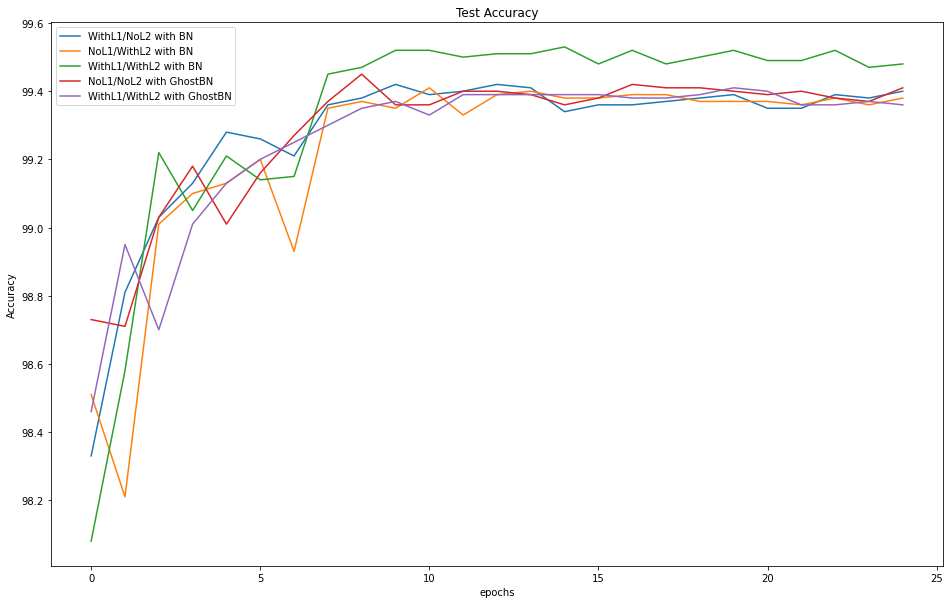

In [12]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(16,10))
plt.axes(xlabel= 'epochs', ylabel= 'Accuracy')
i = 0
for i in range(0,200,25):
    plt.plot(t.test_acc[i:i+25])
plt.title('Test Accuracy')
plt.legend(['WithL1/NoL2 with BN',
         'NoL1/WithL2 with BN',
         'WithL1/WithL2 with BN',
         'NoL1/NoL2 with GhostBN',
         'WithL1/WithL2 with GhostBN'])

In [27]:
list1 = ['WithL1_NoL2 with BN','NoL1_WithL2 with BN','WithL1_WithL2 with BN','NoL1_NoL2 with GhostBN','WithL1_WithL2 with GhostBN']
i= 0
for l in list1:
    print('The minimum test loss for', l, 'is: ', min(t.test_loss[i:i+25]))
    ####### Change here 
    i+=25
print('The overall min loss is: ', min(t.test_loss), ' at index ', t.test_loss.index(min(t.test_loss)) )

The minimum test loss for WithL1_NoL2 with BN is:  0.017343291997443885
The minimum test loss for NoL1_WithL2 with BN is:  0.017693098521092906
The minimum test loss for WithL1_WithL2 with BN is:  0.016915254176757297
The minimum test loss for NoL1_NoL2 with GhostBN is:  0.01860894848573953
The minimum test loss for WithL1_WithL2 with GhostBN is:  0.018555644762516022
The overall min loss is:  0.016915254176757297  at index  69


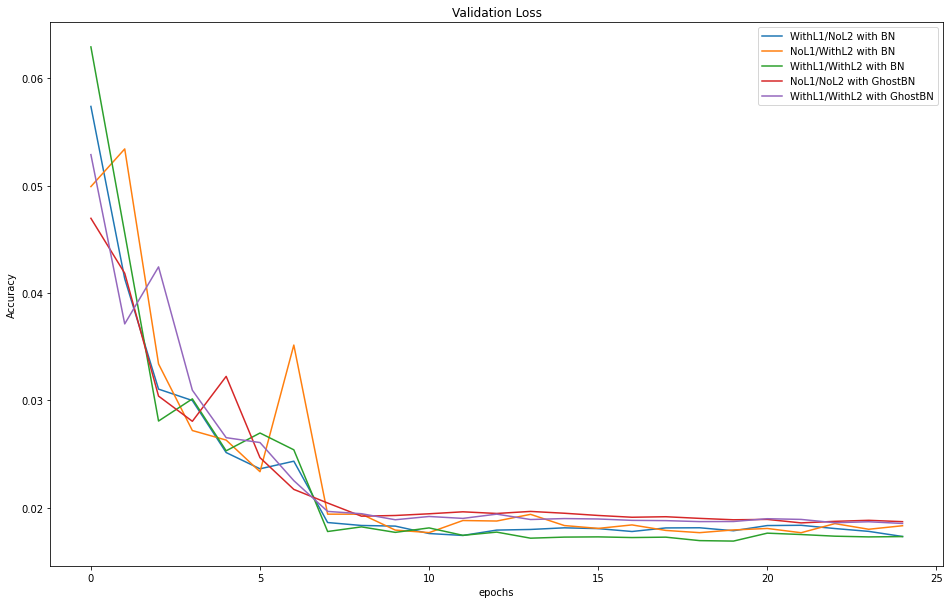

In [14]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(16,10))
plt.axes(xlabel= 'epochs', ylabel= 'Accuracy')
i = 0
for i in range(0,200,25):
    plt.plot(t.test_loss[i:i+25])
plt.title('Validation Loss')
plt.legend(['WithL1/NoL2 with BN',
         'NoL1/WithL2 with BN',
         'WithL1/WithL2 with BN',
         'NoL1/NoL2 with GhostBN',
         'WithL1/WithL2 with GhostBN'])

<Figure size 432x288 with 0 Axes>

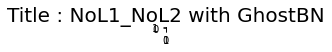

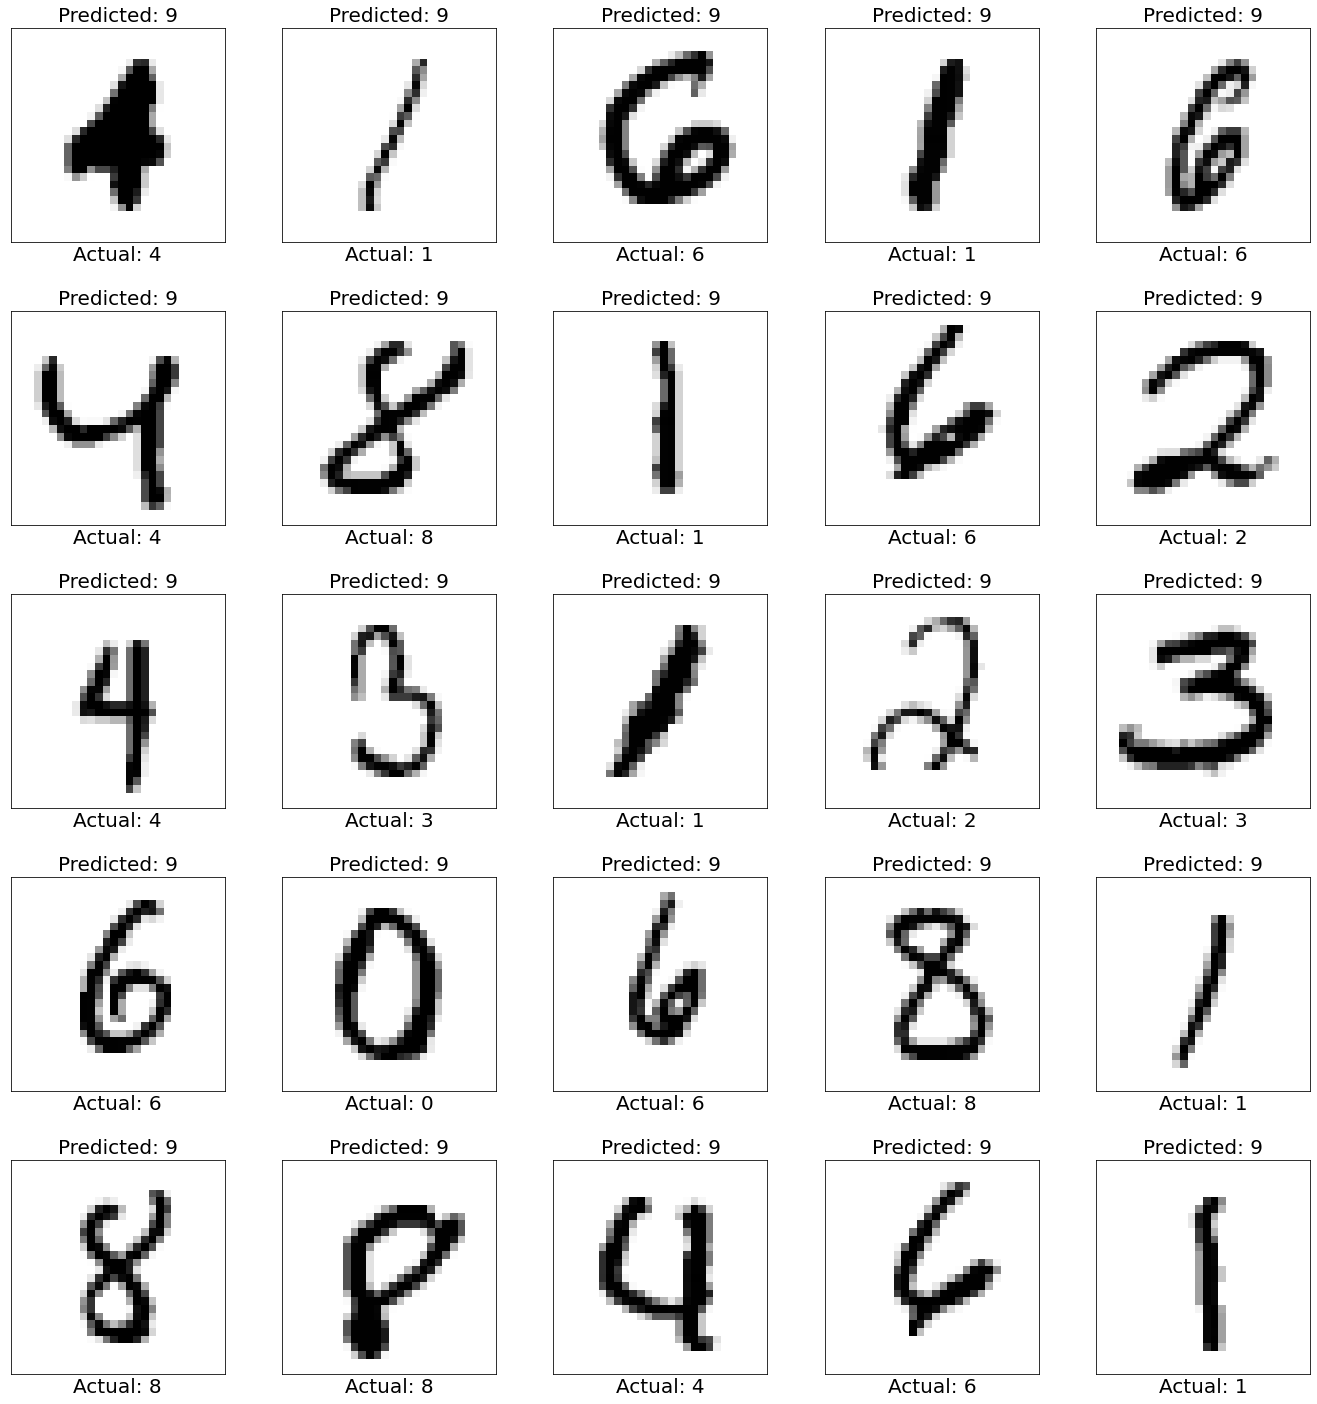

<Figure size 432x288 with 0 Axes>

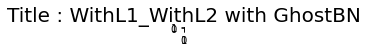

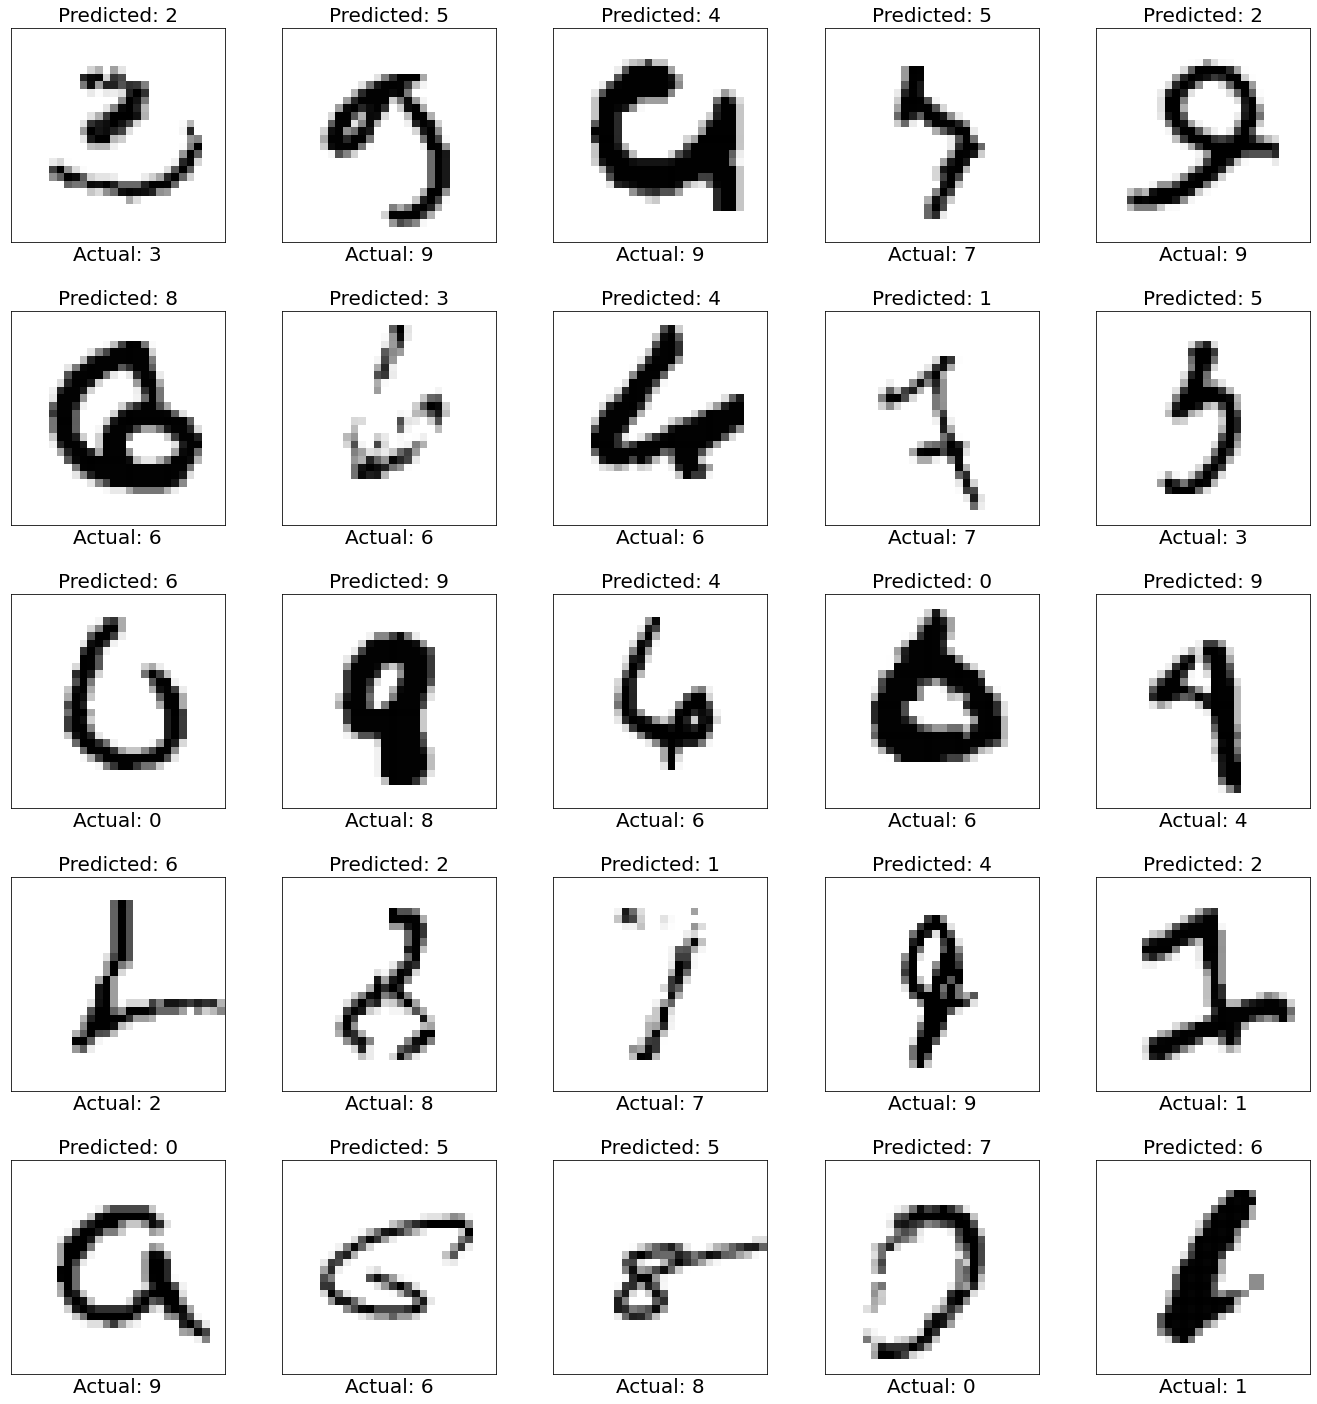

In [29]:
def mis(l):
  figure = plt.figure()
  num_of_images = 25
  
  plt.figure(figsize=(0.01,0.01))
  plt.title(f'Title : {l}', fontdict={'fontsize': 20})

  plt.figure(figsize=(20,20))

  for index in range(0, num_of_images):
    plt.subplot(5, 5, index+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(img[index].cpu().numpy().squeeze(), cmap='gray_r')
    plt.title(f'Predicted: {plab[index]}', fontdict={'fontsize': 20})
    plt.xlabel(f'Actual: {tlab[index]}', fontdict={'fontsize':20})
    plt.tight_layout(pad= 2.5)

import test_misclass as tm
import matplotlib.pyplot as plt
use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")

list1 = ['NoL1_NoL2 with GhostBN','WithL1_WithL2 with GhostBN']
for i, l in enumerate(list1):
    path = gdrivepath+ 'savedmodel/'+l+' classifier.pt'
    #print(i,path)
    if i == 0:
        h = m.Net(gbn= False).to(device)
    else:
        h = m.Net(gbn= True).to(device)

# refer https://pytorch.org/tutorials/beginner/saving_loading_models.html
    try:
      h.load_state_dict(torch.load(path), strict=False)
    except RuntimeError as e:
#      # print('Ignoring "' + str(e) + '"')
      continue
    h.eval()
    tlab, plab, img = tm.test(h, device, test_loader)
    #print(tlab)
    mis(l)